In [1]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Rozwiązania Zadania 1 znajduje się pod kodem z zajęć 1 i 2:

Link do sekcji: [Zadanie 1](#scrollTo=UazBQJK1A-Vq&line=1&uniqifier=1)

### Zajęcia 1

In [3]:
imagePath = '/content/drive/MyDrive/Colab Notebooks/Wizja komputerowa/cat.jpg'

image = cv2.imread(imagePath, cv2.IMREAD_COLOR)

image_grey = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

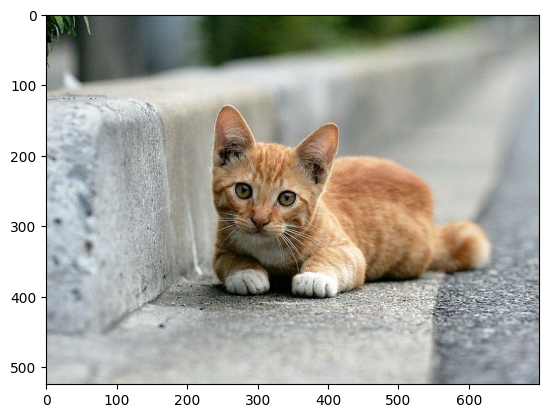

In [4]:
plt.imshow(image[:, :, ::-1]) # The [:, :, ::-1] part is used to reverse the color channels from BGR (OpenCV's default) to RGB (Matplotlib's default).

In [5]:
# plt.imshow(image, cmap='gray', interpolation='bicubic')

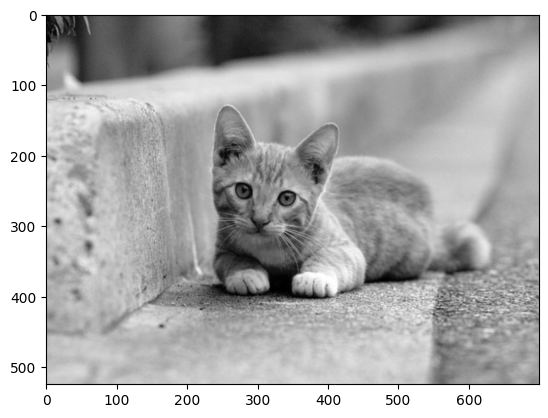

In [6]:
plt.imshow(image_grey, cmap='gray', interpolation='bicubic')

array([[[209, 195, 183],
        [207, 193, 181],
        [204, 190, 178],
        ...,
        [179, 174, 165],
        [177, 172, 163],
        [175, 170, 161]],

       [[210, 196, 184],
        [206, 192, 180],
        [201, 187, 175],
        ...,
        [175, 170, 161],
        [175, 170, 161],
        [175, 170, 161]],

       [[216, 204, 192],
        [215, 203, 191],
        [212, 200, 188],
        ...,
        [178, 173, 164],
        [178, 173, 164],
        [178, 173, 164]],

       ...,

       [[198, 202, 191],
        [197, 201, 190],
        [196, 199, 190],
        ...,
        [158, 147, 139],
        [156, 147, 138],
        [155, 146, 137]],

       [[201, 205, 194],
        [198, 202, 191],
        [196, 199, 190],
        ...,
        [156, 145, 137],
        [156, 147, 138],
        [156, 147, 138]],

       [[202, 206, 195],
        [196, 200, 189],
        [194, 198, 187],
        ...,
        [155, 143, 137],
        [156, 146, 139],
        [156, 146, 139]]], dtype=uint8)
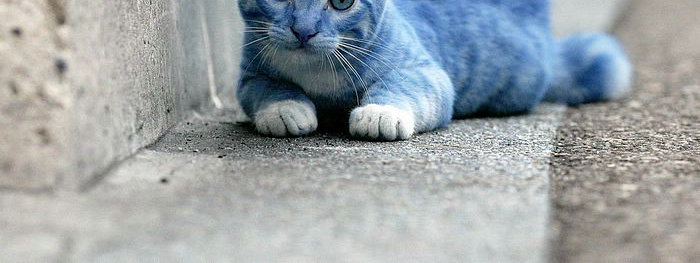

In [7]:
image_edit = image[image.shape[0] // 2:, :, :]
image_edit

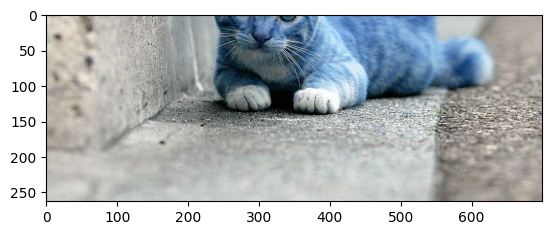

In [8]:
plt.imshow(image_edit[:, :, ::1])

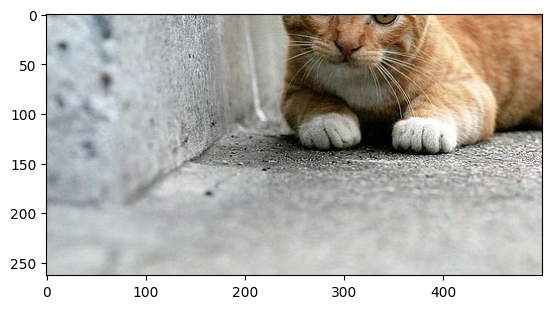

In [9]:
plt.imshow(image_edit[:, :500, ::-1])

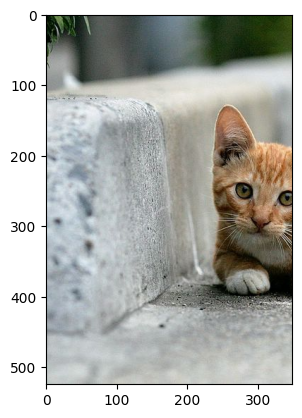

In [10]:
height, width, channels = image.shape
left_half = image[:, :width // 2, :] # image[row (height), column (width), z axis]
left_quarter = image[:height // 2, :width // 2, :]
plt.imshow(left_half[:, :, ::-1])

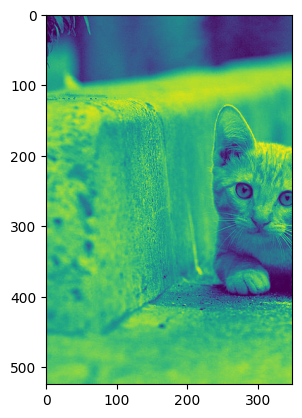

In [11]:
plt.imshow(left_half[:, :, ::-5])

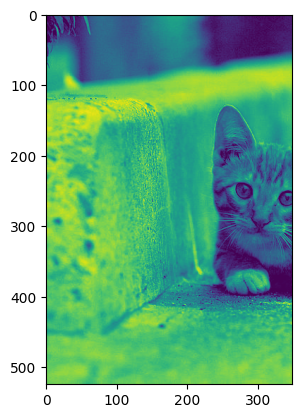

In [12]:
plt.imshow(left_half[:, :, ::5])

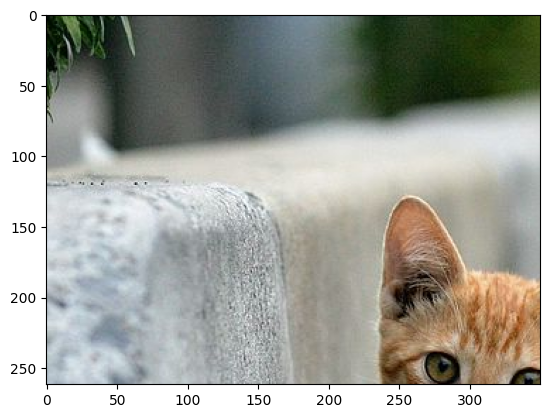

In [13]:
plt.imshow(left_quarter[:, :, ::-1])

In [14]:
f'Wymiary obrazu: {image.shape[0]} x {image.shape[1]} px'

'Wymiary obrazu: 525 x 700 px'

In [15]:
image.shape # height, width, layers number

(525, 700, 3)

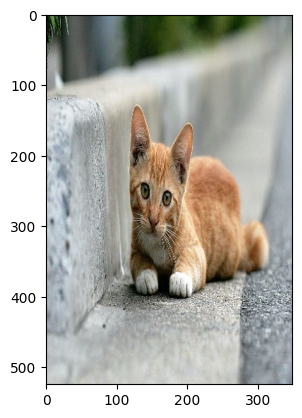

In [16]:
image_scale = image[:, ::2] # displays every second column
plt.imshow(image_scale[:, :, ::-1])

In [17]:
f'Wymiary obrazu: {image.shape[0]} x {image.shape[1]} px'
pixel = image[500, 500]
pixel

array([207, 212, 213], dtype=uint8)

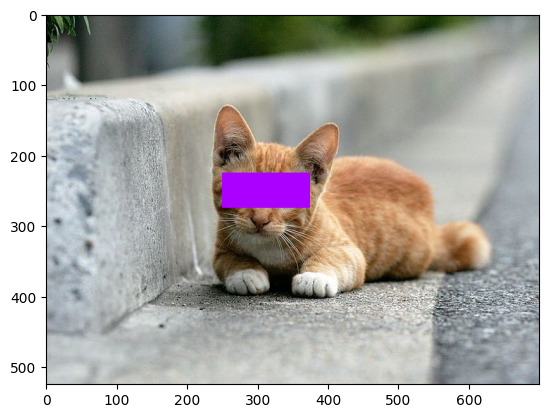

In [18]:
image = cv2.imread(imagePath, cv2.IMREAD_COLOR)

image[225:275, 250:375, :] = [255, 0, 171] # edit pixels: [y axis, x axis, ]

plt.imshow(image[:, :, ::-1])

### Zajęcia 2

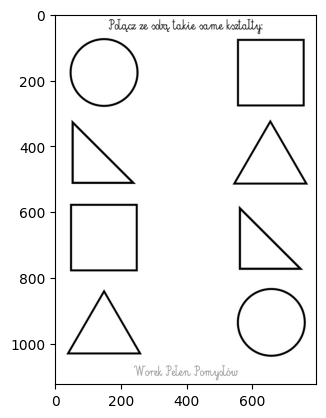

In [19]:
imgPath = '/content/drive/MyDrive/Colab Notebooks/Wizja komputerowa/figury.jpg'
img = cv2.imread(imgPath)

# cv2.putText(img, "Cwiczenia nr 2", (250,500), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0,0,200))

plt.imshow(img[:, :, ::-1])

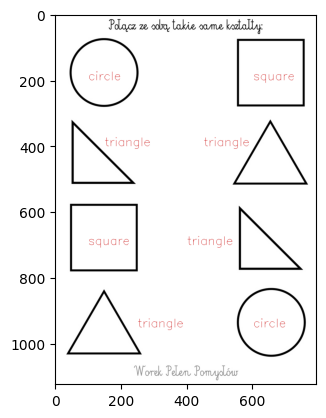

In [20]:
img = cv2.imread(imgPath)

cv2.putText(img, "circle", (100, 200), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 200))
cv2.putText(img, "square", (600, 200), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 200))

cv2.putText(img, "triangle", (150, 400), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 200))
cv2.putText(img, "triangle", (450, 400), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 200))

cv2.putText(img, "square", (100, 700), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 200))
cv2.putText(img, "triangle", (400, 700), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 200))

cv2.putText(img, "triangle", (250, 950), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 200))
cv2.putText(img, "circle", (600, 950), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 200))

plt.imshow(img[:, :, ::-1])

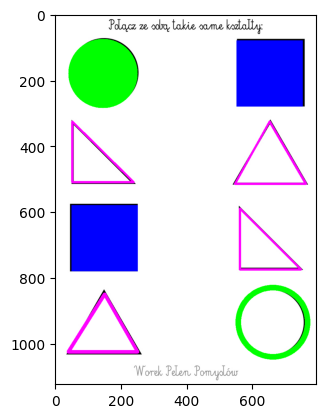

In [21]:
img = cv2.imread(imgPath)

cv2.rectangle(img, (550, 80), (750, 280), (255, 0, 0), -1)
cv2.rectangle(img, (50, 580), (250, 780), (255, 0, 0), -1)

cv2.circle(img, (145, 180), 105, (0, 255, 0), -1)
cv2.circle(img, (660, 935), 105, (0, 255, 0), 15)

# triangle top left
w = np.array([
    [52, 326],
    [52, 510],
    [238, 510]
], dtype=np.int32)
w = w.reshape((-1, 1, 2))
cv2.polylines(img, pts=[w], isClosed=True,  color=(255, 0, 255), thickness=5)

# triangle bottom left
w = np.array([
    [150, 850],
    [40, 1025],
    [250, 1025]
], dtype=np.int32)
w = w.reshape((-1, 1, 2))
cv2.polylines(img, pts=[w], isClosed=True,  color=(255, 0, 255), thickness=10)

# triangle bottom right
w = np.array([
    [560, 590],
    [560, 775],
    [745, 775]
], dtype=np.int32)
w = w.reshape((-1, 1, 2))
cv2.polylines(img, pts=[w], isClosed=True,  color=(255, 0, 255), thickness=5)

# triangle top right
w = np.array([
    [650, 326],
    [545, 515],
    [760, 515]
], dtype=np.int32)
w = w.reshape((-1, 1, 2))
cv2.polylines(img, pts=[w], isClosed=True,  color=(255, 0, 255), thickness=5)

plt.imshow(img[:, :, ::-1])

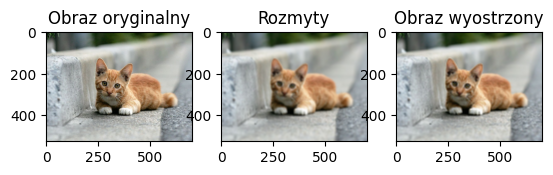

In [22]:
img2Path = '/content/drive/MyDrive/Colab Notebooks/Wizja komputerowa/cat.jpg'

# Rozmazywanie zdjęcia (rozmiar jądra filtra uśredniającego określa, ile pikseli wokół każdego punktu obrazu ma być uwzględniane przy obliczaniu nowej wartości piksela)
img2 = cv2.imread(img2Path)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_blur = cv2.imread(img2Path)

# Stworzenie siatki wykresów
plt.subplot(1, 3, 1)
plt.imshow(img2)
plt.title('Obraz oryginalny')

# Rozmazanie zdjecia
img_blur = cv2.blur(img2, (10, 10))

plt.subplot(1, 3, 2)
plt.imshow(img_blur)
plt.title('Rozmyty')

# Wyostrzenie
kernel = np.array(
    [[-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]])
img_sharpened = cv2.filter2D(img_blur, cv2.CV_8U, kernel)

plt.subplot(1, 3, 3)
plt.imshow(img_sharpened)
plt.title('Obraz wyostrzony')

plt.show()

## Zadanie 1

1. Zadania z plikiem figury.jpg:

  - wyciąć napisy znajdujące się na górze i dole grafiki
  - podzielić środek zdjęcia kreską o grubości 20 pixeli, tak aby figury były ułożone w dwóch
  kolumnach
  - dodać obramowanie zdjęcia
  - dokonać edycji pixeli w dwóch różnych figurach (jak na przykładzie), zamalowując je na różne
  kolory
  - zapisać zdjęcie ze zmienioną nazwą


2. Zadania z dowolnym plikiem:

  - zastosować rozmycie
  - umieścić na kopii rozmytego zdjęcia pochylony pod dowolnym kątem, czerwony prostokąt z
  napisem “TOP SECRET”
  - wyostrzyć oryginalne zdjęcie, przy użyciu dowolnego jądra (proszę przetestować różne
  konfiguracje w celu uzyskania najlepszego efektu).

#### Zadania z plikiem figury.jpg:

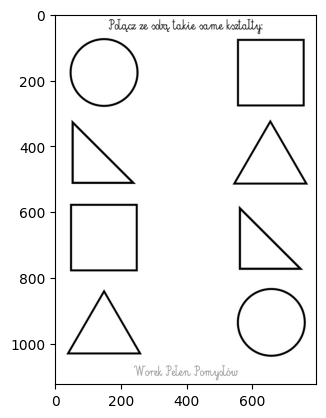

In [23]:
imagePath = '/content/drive/MyDrive/Colab Notebooks/Wizja komputerowa/figury.jpg'
image = cv2.imread(imagePath)

plt.imshow(image[:, :, ::-1])

##### Wycięcie napisów znajdujących się na górze i dole grafiki

[182.93209722 182.93209722 182.93209722] 0.45%
[129.44315189 129.44315189 129.44315189] 0.51%
[58.17287544 58.17287544 58.17287544] 0.58%
[1.44257602 1.44257602 1.44257602] 3.41%
[254.87348228 254.87348228 254.87348228] 95.06%


-1

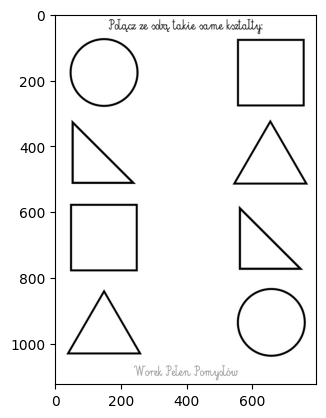

In [24]:
# find the most dominant color in the image.
# Not really needed here as the background color is white,
# but left for my future reference

def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

# Load image and convert to a list of pixels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
reshape = image.reshape((image.shape[0] * image.shape[1], 3))

# Find and display most dominant colors
cluster = KMeans(n_clusters=5).fit(reshape)
visualize = visualize_colors(cluster, cluster.cluster_centers_)
visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
plt.imshow(image[:, :, ::-1])
cv2.waitKey()

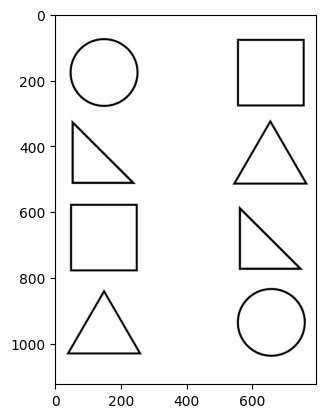

In [25]:
# convert the image to grayscale for easier processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Increase contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced_gray = clahe.apply(gray)

# Apply morphological operations (opening or closing; in this case opening was best one) to enhance text
kernel = np.ones((3, 3), np.uint8)
opened = cv2.morphologyEx(enhanced_gray, cv2.MORPH_OPEN, kernel, iterations = 2)
# apply thresholding to create a binary image where text is highlighted
thresh = cv2.threshold(opened, 150, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]


# create a rectangular kernel used for morphological closing.
# It helps to fill in small gaps and connect nearby text regions
close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (500, 5))
# closing operation on the thresholded image
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, close_kernel, iterations=1)


# creates another rectangular kernel for dilation.
# Dilation expands the text regions, making them more prominent.
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 5))
# apply dilation to the closed image
dilate = cv2.dilate(close, dilate_kernel, iterations=1)


# find the contours (outlines) of the text regions in the dilated image
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    x, y, w, h = cv2.boundingRect(c)

    # Check aspect ratio to filter out shapes that are not text-like
    # Ensure w and h are scalars
    w = w[0] if isinstance(w, np.ndarray) else w
    h = h[0] if isinstance(h, np.ndarray) else h
    aspect_ratio = float(w) / h

    if area > 500 and area < 50000 and aspect_ratio > 2:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 255), -1)

plt.imshow(image[:, :, ::-1])

##### Podzielić środek zdjęcia kreską o grubości 20 pixeli, tak aby figury były ułożone w dwóch kolumnach

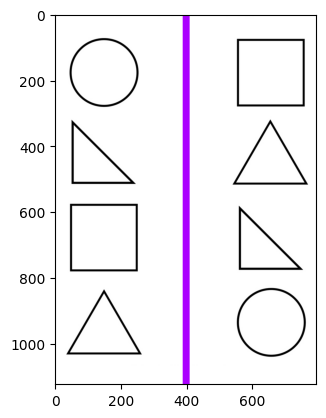

In [26]:
image_center_column = image.shape[1] // 2

cv2.line(image, (image_center_column, 0), (image_center_column, image.shape[0]), (255, 0, 171), 20)

plt.imshow(image[:, :, ::-1])

##### Dodanie obramowania zdjęcia

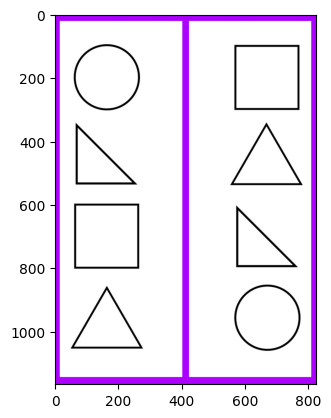

In [27]:
top = int(0.02 * image.shape[0])  # shape[0] = rows
bottom = top
left = int(0.02 * image.shape[1])  # shape[1] = cols
right = left
value = [255, 0, 171]
image = cv2.copyMakeBorder(
    image, top, bottom, left, right, cv2.BORDER_CONSTANT, None, value
)
plt.imshow(image[:, :, ::-1])

##### Edycji pixeli w dwóch różnych figurach (jak na przykładzie), zamalowując je na różne kolory

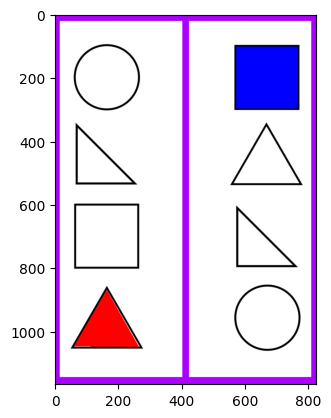

In [28]:
min_area_rect = float('inf') # Initialize with infinity
min_area_tri = float('inf')
smallest_rect = None
smallest_triangle = None

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edged image
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Loop over the contours
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    # Calculate the area of shapes
    area = cv2.contourArea(approx)

    # Check if the approximated contour has 4 points (rectangle)
    if len(approx) == 4:
        # Update smallest rectangle if current area is smaller
        if area < min_area_rect:
            min_area_rect = area
            smallest_rect = approx
    # Check if the approximated contour has 3 points (triangle)
    if len(approx) == 3:
      if area < min_area_tri:
          min_area_tri = area
          smallest_triangle = approx

# Draw the smallest rectangle (if found)
if smallest_rect is not None:
    # cv2.drawContours(image, [smallest_rect], -1, (0, 255, 0), 10)
    x, y, w, h = cv2.boundingRect(smallest_rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), -1)

# Draw the smallest triangle (if found)
if smallest_triangle is not None:
    # cv2.drawContours(image, [smallest_triangle], -1, (0, 255, 0), 10)
    cv2.fillPoly(image, pts=[smallest_triangle], color=(0, 0, 255))

plt.imshow(image[:, :, ::-1])


##### Zapisanie zdjęcia ze zmienioną nazwą

In [29]:
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Wizja komputerowa/figury_nowe.jpg', image)

True

#### Zadania z dowolnym plikiem

##### Zastosowanie rozmycia

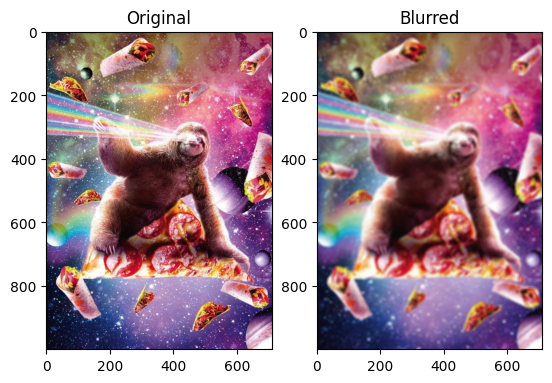

In [30]:
path = '/content/drive/MyDrive/Colab Notebooks/Wizja komputerowa/image.jpg'

image = cv2.imread(path)
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_blur = cv2.blur(image2, (10, 10))

plt.subplot(1, 2, 1)
plt.imshow(image2)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(image_blur)
plt.title('Blurred')

plt.show()

##### Umieszczenie na kopii rozmytego zdjęcia pochylony pod dowolnym kątem, czerwonego prostokąta z napisem “TOP SECRET”

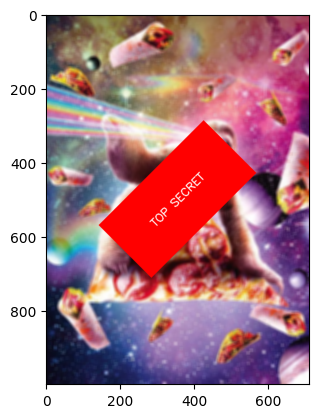

In [31]:
# Create a copy of image_blur
image_blur_copy = image_blur.copy()

# Define the rectangle's vertices (adjust coordinates for desired size)
rect_points = np.array([[-200, -100], [200, -100], [200, 100], [-200, 100]], dtype=np.int32)

# Define rotation angle (45 degrees)
angle = 45

# Get image center
center = (image_blur_copy.shape[1] // 2, image_blur_copy.shape[0] // 2)

# Get rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# Rotate the rectangle points
rotated_rect_points = cv2.transform(np.array([rect_points]), rotation_matrix)[0]

# Calculate translation to center the rectangle
translation = np.array(center) - np.mean(rotated_rect_points, axis=0)

# Translate the rotated rectangle points to the center
rotated_rect_points += translation.astype(int)

# Draw the filled rotated rectangle
cv2.fillPoly(image_blur_copy, [rotated_rect_points], color=(255, 0, 0))

# --- Rotate the text ---
# Get text size for positioning
text = "TOP SECRET"
(text_width, text_height), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)

# Calculate text position to center it within the rectangle before rotation
text_x = int(center[0] - text_width / 2)
text_y = int(center[1] + text_height / 2)

# Create a temporary image to draw the text
temp_image = np.zeros_like(image_blur_copy, dtype=np.uint8)
cv2.putText(temp_image, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Rotate the temporary image (containing the text)
rotated_temp_image = cv2.warpAffine(temp_image, rotation_matrix, (temp_image.shape[1], temp_image.shape[0]))

# Combine the rotated text with the main image
image_blur_copy = cv2.bitwise_or(image_blur_copy, rotated_temp_image)

plt.imshow(image_blur_copy)
plt.show()

##### Wyostrzenie oryginalnego zdjęcia, przy użyciu dowolnego jądra.

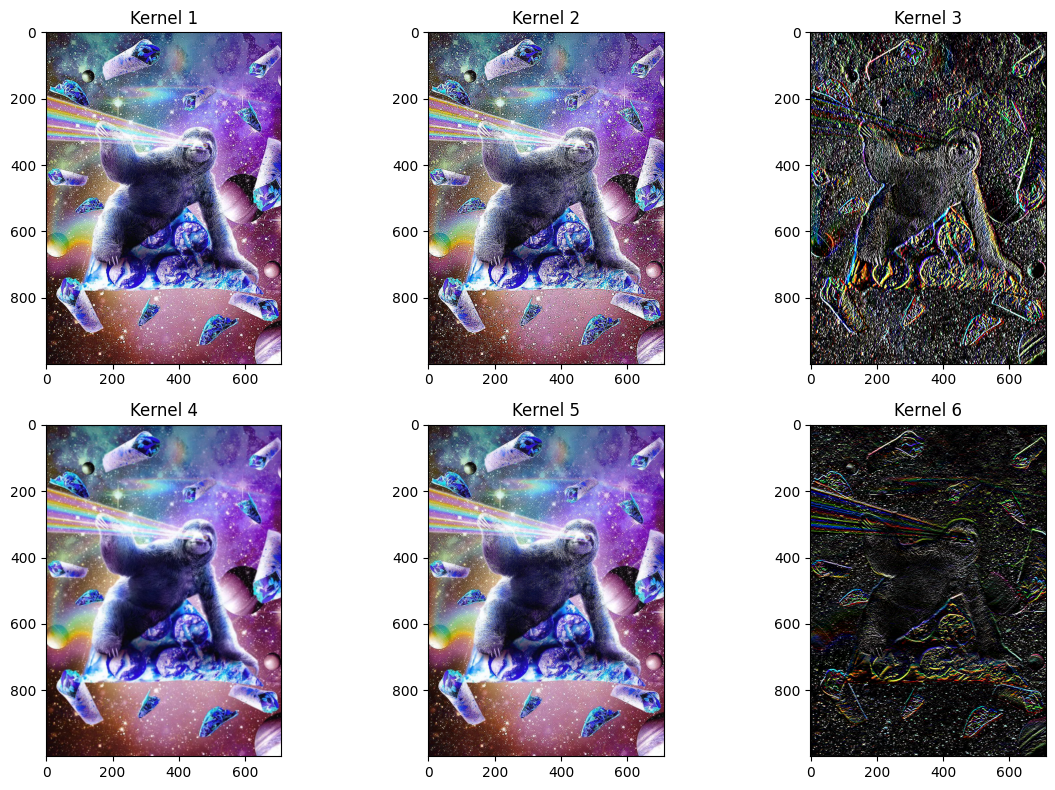

In [32]:
# Sharpening kernel (basic)
kernel1 = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Sharpening kernel (stronger)
kernel2 = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

# Kirsch compass kernel (one direction - 45 degrees)
kernel3 = np.array([
    [-3, -3, 5],
    [-3, 0, 5],
    [-3, -3, 5]
])

# Gaussian blur kernel (used for sharpening when applied with a sharpened Gaussian)
kernel4 = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16

# Unsharp masking kernel
kernel5 = np.array([
    [1, -2, 1],
    [-2, 5, -2],
    [1, -2, 1]
])

# Sobel operator (horizontal)
kernel6 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

image_sharpened1 = cv2.filter2D(image2, cv2.CV_8U, kernel1)
image_sharpened2 = cv2.filter2D(image2, cv2.CV_8U, kernel2)
image_sharpened3 = cv2.filter2D(image2, cv2.CV_8U, kernel3)
image_sharpened4 = cv2.filter2D(image2, cv2.CV_8U, kernel4)
image_sharpened5 = cv2.filter2D(image2, cv2.CV_8U, kernel5)
image_sharpened6 = cv2.filter2D(image2, cv2.CV_8U, kernel6)

images = [image_sharpened1, image_sharpened2, image_sharpened3,
          image_sharpened4, image_sharpened5, image_sharpened6]
titles = ['Kernel 1', 'Kernel 2', 'Kernel 3',
          'Kernel 4', 'Kernel 5', 'Kernel 6']

plt.figure(figsize=(12, 8))

num_images = len(images)
for i in range(num_images):
  plt.subplot(2, 3, i + 1)
  plt.imshow(images[i][:, :, ::-1])
  plt.title(titles[i])

plt.tight_layout()
plt.show()